In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle
import urllib.request
import os

import matplotlib.pyplot as plt

In [2]:
def get_gwno():

    #location = '/home/projects/ku_00017/data/raw/PRIO'
    location = '/home/simon/Documents/Bodies/data/PRIO'#local
    #path_gwno = location + '/PRIO-GRID Yearly Variables for 2003-2009 - 2022-06-16.csv' #https://grid.prio.org/#/download # need to figrue out the API
    path_gwno = location + '/PRIO-GRID Yearly Variables for 1989-2014 - 2022-06-16.csv' #https://grid.prio.org/#/download # need to figrue out the API

    # why not just go 1989 - 2019 like ucdp...

    gwno = pd.read_csv(path_gwno)

    return gwno

def get_prio_shape():

    #location = '/home/projects/ku_00017/data/raw/PRIO'
    location = '/home/simon/Documents/Bodies/data/PRIO'#local
    path_prio = location + '/priogrid_shapefiles.zip'

    if os.path.isfile(path_prio) == True:
        
        print('File already downloaded')
        prio_grid = gpd.read_file('zip://' + path_prio)

        prio_grid =  pd.DataFrame(prio_grid.drop(columns = ['geometry']))

    else:
        print('Beginning file download PRIO...')
        url_prio = 'http://file.prio.no/ReplicationData/PRIO-GRID/priogrid_shapefiles.zip'

        urllib.request.urlretrieve(url_prio, path_prio)
        prio_grid = gpd.read_file('zip://' + path_prio)

        prio_grid =  pd.DataFrame(prio_grid.drop(columns = ['geometry']))

    return prio_grid


def get_gwno():

    #location = '/home/projects/ku_00017/data/raw/PRIO'
    location = '/home/simon/Documents/Bodies/data/PRIO' #local
    #path_gwno = location + '/PRIO-GRID Yearly Variables for 2003-2009 - 2022-06-16.csv' #https://grid.prio.org/#/download # need to figrue out the API
    path_gwno = location + '/PRIO-GRID Yearly Variables for 1989-2014 - 2022-06-16.csv' #https://grid.prio.org/#/download # need to figrue out the API

    # why not just go 1989 - 2019 like ucdp...

    gwno = pd.read_csv(path_gwno)

    return gwno


def get_ucdp():

    #location = '/home/projects/ku_00017/data/raw/UCDP'
    location = '/home/simon/Documents/Bodies/data/UCDP' #local
    path_ucdp = location + "/ged201-csv.zip"
    
    if os.path.isfile(path_ucdp) == True:
        print('file already downloaded')
        ucdp = pd.read_csv(path_ucdp, low_memory=False)


    else: 
        print('Beginning file download UCDP...')

        url_ucdp = 'https://ucdp.uu.se/downloads/ged/ged201-csv.zip'
    
        urllib.request.urlretrieve(url_ucdp, path_ucdp)
        ucdp = pd.read_csv(path_ucdp, low_memory=False)

    ucdp['month'] = pd.to_datetime(ucdp['date_start']).dt.month
    ucdp.rename(columns= {'priogrid_gid' : 'gid'}, inplace= True)
    ucdp['in_ucdp'] = True # handy later when I wnat to remove water and stuff.


    # just to save ram for now !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    sub_years = sorted(ucdp['year'].unique())[:2]
    ucdp = ucdp[ucdp['year'].isin(sub_years)]
    # -----------------------------------------------------------------------------------------------------

    
    return ucdp


In [3]:
# def add_months(ucdp, world_grid):

#     diff = ucdp['year'].max() - world_grid['year'].max()

#     subset_list = []

#     for i in np.arange(1, diff+1, 1):

#         subset = world_grid[world_grid['year'] == world_grid['year'].max()].copy()
#         subset['year'] = world_grid['year'].max() + i

#         subset_list.append(subset)

#     new_years = pd.concat(subset_list)
#     world_grid_all_years = pd.concat([world_grid, new_years])

#     month = [str(i).zfill(2) for i in np.arange(1,13,1)]
#     world_grid_all_years.loc[:,'month'] = world_grid_all_years.apply(lambda _: month, axis=1)
#     world_grid_all_months = world_grid_all_years.sort_values('year').explode('month').copy()
#     world_grid_all_months['year_months_start'] =  world_grid_all_months['year'].astype(str) + '-' +  world_grid_all_months['month'].astype(str)

#     year_months = sorted(world_grid_all_months['year_months_start'].unique())
#     ts = len(year_months)
#     month_ids = np.arange(109, ts + 109, 1)
#     month_id_dict = dict(zip(year_months,month_ids))
#     month_df = pd.DataFrame({'year_months_start' : year_months, 'month_id': month_ids})
#     world_grid_all_months_id = world_grid_all_months.merge(month_df, how = 'left', on = 'year_months_start')

#     return world_grid_all_months_id


# def prio_ucdp_merge(ucdp, world_grid_all_months):
#     ucdp_tmp1 = ucdp.copy()

#     ucdp_tmp1['year_months_start'] = ucdp_tmp1['date_start'].str.slice(start = 0, stop = 7) # Date YYYY-MM-DD
#     ucdp_tmp1['year_months_end'] = ucdp_tmp1['date_start'].str.slice(start = 0, stop = 7) # Date YYYY-MM-DD


#     mask1 = (ucdp_tmp1['year'] != ucdp_tmp1['year_months_start'].str.slice(start = 0, stop = 4).astype(int))
#     mask2 = (ucdp_tmp1['year'] != ucdp_tmp1['year_months_end'].str.slice(start = 0, stop = 4).astype(int))

#     # correction. Note that end and start year for the four entries that is corrected is the same.
#     ucdp_tmp1.loc[mask1 | mask2, 'year'] = ucdp_tmp1.loc[mask1 | mask2,'year_months_start'].str.slice(start = 0, stop = 4).astype(int)

#     feature_list = ['deaths_a','deaths_b', 'deaths_civilians', 'deaths_unknown','best', 'high', 'low']

#     ucdp_monthly_unit = ucdp_tmp1.groupby(['year_months_start','year', 'priogrid_gid']).sum()[feature_list].reset_index()
#     ucdp_monthly_unit.rename(columns={'priogrid_gid':'gid'}, inplace=True)

#     ucdp_monthly_unit['log_best'] = np.log(ucdp_monthly_unit['best'] +1)
#     ucdp_monthly_unit['log_low'] = np.log(ucdp_monthly_unit['low'] +1)
#     ucdp_monthly_unit['log_high'] = np.log(ucdp_monthly_unit['high'] +1)

#     prio_ucdp_df = world_grid_all_months.merge(ucdp_monthly_unit, how = 'left', on = ['gid', 'year_months_start', 'year'])
#     prio_ucdp_df.fillna(0, inplace=True)

#     return prio_ucdp_df

In [4]:
# and you can also add some prio stuff here.

In [5]:
def make_volumn(df):

    # we start with wat we know - but there is no reason not to try with more down til line.

    sub_df = df[['gid', 'xcoord', 'ycoord', 'month_id', 'best', 'low', 'high', 'log_best', 'log_low', 'log_high']].copy() # remove the everything also the geo col.

    sub_df_sorted = sub_df.sort_values(['month_id', 'ycoord', 'xcoord'], ascending = [True, False, True])

    # try to keep the jazz
    #grid_ucdpS = grid_ucdpS[['gid','best', 'low',  'high', 'log_best', 'log_low', 'log_high']].copy() # remove the everything also the geo col. But keep gid. Why not.

    x_dim = sub_df['xcoord'].unique().shape[0]
    y_dim = sub_df['ycoord'].unique().shape[0]
    z_dim = sub_df['month_id'].unique().shape[0]

    ucpd_vol = np.array(sub_df_sorted).reshape((z_dim, y_dim, x_dim, -1))

    return ucpd_vol

In [6]:
def monthly_grid(prio_grid, ucdp):

    years = [sorted(ucdp['year'].unique())] * prio_grid.shape[0]
    months = [list(np.arange(1, 13))] * prio_grid.shape[0]

    prio_grid['year'] = years
    prio_grid['month'] = months

    prio_grid = prio_grid.explode('year').reset_index(drop=True) 
    prio_grid = prio_grid.explode('month').reset_index(drop=True) 

    return prio_grid

In [7]:

def make_full_grid(prio_grid, ucdp, gwno):

    prio_grid = prio_grid.merge(gwno, on = ['gid', 'year'], how = 'left') 

    # you can easily add monthly prio features here (if you got the ram for it)

    full_grid = prio_grid.merge(ucdp, on = ['gid', 'year', 'month'], how = 'left') 
    full_grid.fillna({'best' : 0, 'low' : 0, 'high' : 0, 'log_best' : 0, 'log_low' : 0, 'log_high' : 0, 'gwno' : 0}, inplace = True) # for gwno 0 is no country
    full_grid.fillna({'in_ucdp' : False}, inplace = True)

    full_grid['log_best'] = np.log(full_grid['best'] + 1)
    full_grid['log_high'] = np.log(full_grid['high'] + 1)
    full_grid['log_low'] = np.log(full_grid['low'] + 1)

    return full_grid

In [18]:
def add_month_id(prio_grid):
    ts = prio_grid['year_month'].unique()
    n_ts = len(ts)
    month_ids = np.arange(109, n_ts + 109, 1)
    month_id_df = pd.DataFrame({'year_month' : ts, 'month_id': month_ids})
    prio_grid = prio_grid.merge(month_id_df, on = 'year_month', how = 'left')

    return prio_grid

In [ ]:
def check_month_id(prio_grid):

    for year in prio_grid['year'].unique():
        print(year, end = ': ')
        print(prio_grid[prio_grid['year'] == year]['month_id'].unique(), end = ': ')
        print(len(prio_grid[prio_grid['year'] == year]['month_id'].unique()))

In [8]:
prio_grid = get_prio_shape()
gwno = get_gwno()
ucdp = get_ucdp()
prio_grid = monthly_grid(prio_grid, ucdp)
prio_grid = make_full_grid(prio_grid, ucdp, gwno)
prio_grid = add_month_id(prio_grid)

File already downloaded
file already downloaded


In [19]:
check_month_id(prio_grid)

In [12]:
prio_grid.sort_values(['year', 'month'], inplace = True)

In [15]:
prio_grid['year_month'] = prio_grid['year'].astype(str) + '_' + prio_grid['month'].astype(str) 

In [ ]:
def add_month_id(prio_grid):
    ts = prio_grid['year_month'].unique()
    n_ts = len(ts)
    month_ids = np.arange(109, ts + 109, 1)
    month_id_df = pd.DataFrame({'year_month' : ts, 'month_id': month_ids})
    prio_grid = prio_grid.merge(month_id_df, on = 'year_month', how = 'left')

    return prio_grid

In [ ]:
    ts = len(year_months)
    month_ids = np.arange(109, ts + 109, 1)
    month_id_dict = dict(zip(year_months,month_ids))
    month_df = pd.DataFrame({'year_months_start' : year_months, 'month_id': month_ids})
    world_grid_all_months_id = world_grid_all_months.merge(month_df, how = 'left', on = 'year_months_start')

In [ ]:
full_grid['month_id'] = 

In [11]:
full_grid.columns

Index(['gid', 'xcoord', 'ycoord', 'col', 'row', 'year', 'month', 'gwno', 'id',
       'relid', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'country', 'country_id', 'region', 'event_clarity',
       'date_prec', 'date_start', 'date_end', 'deaths_a', 'deaths_b',
       'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low', 'gwnoa',
       'gwnob', 'in_ucdp', 'log_best', 'log_high', 'log_low'],
      dtype='object')

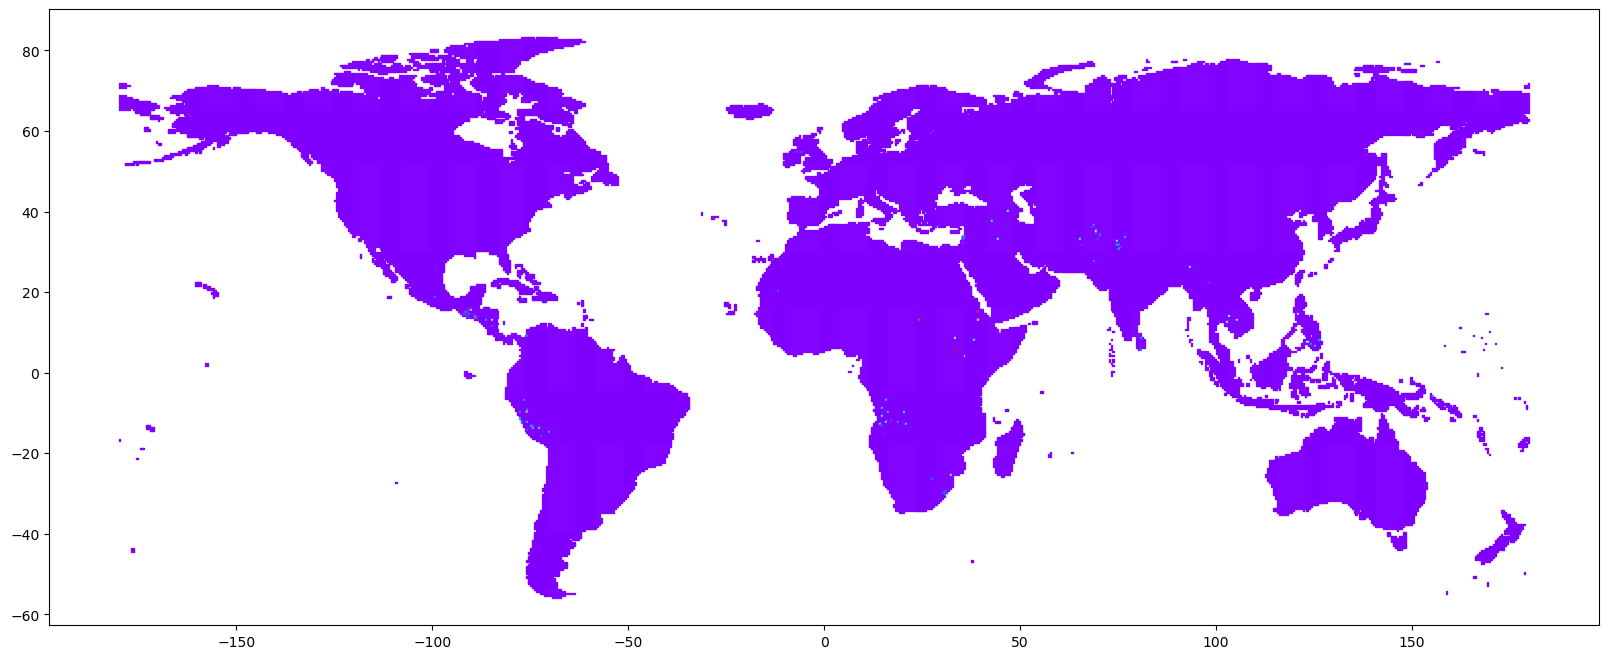

In [10]:
mask = (prio_grid['year'] == 1989) & (prio_grid['month'] == 1) & (prio_grid['gwno'] != 0)
sub_grid = prio_grid[mask]

x = sub_grid['xcoord']
y = sub_grid['ycoord']
z = sub_grid['log_best']

plt.figure(figsize= [20,8])
plt.scatter(x, y, c = z, marker= 's', s = 1, cmap = 'rainbow' )
plt.show()

In [ ]:
prio_grid['year'].unique()

In [ ]:
ucdp['year'].unique()

In [ ]:
sub_years = sorted(ucdp['year'].unique())[:2]
ucdp = ucdp[ucdp['year'].isin(sub_years)]

In [ ]:
ucdp['in_ucdp'] = True

In [ ]:
ucdp

In [ ]:
prio_grid

In [ ]:
ucdp['month'] = pd.to_datetime(ucdp['date_start']).dt.month
ucdp.rename(columns= {'priogrid_gid' : 'gid'}, inplace= True)




In [ ]:
sorted(ucdp['year'].unique())[:2]

In [ ]:
years = list(prio_grid['year'].unique())
print(years)

In [ ]:
prio_grid

In [ ]:
full_grid = prio_grid.merge(ucdp, on = ['gid', 'year', 'month'], how = 'left') 

In [ ]:
mask = (prio_grid['year'] == 1989) & (prio_grid['month'] == 1)
sub_grid = prio_grid[mask]

x = sub_grid['xcoord']
y = sub_grid['ycoord']
z = sub_grid['gid']

plt.figure(figsize= [20,10])
plt.scatter(x, y, c = z, marker= 'o')
plt.show()

In [ ]:
# x = ucdp[ucdp['year'] == 2017]['longitude']
# y = ucdp[ucdp['year'] == 2017]['latitude']
# z = np.log(ucdp[ucdp['year'] == 2017]['best'] + 1)

# plt.figure(figsize= [20,10])
# plt.scatter(x, y, c = z, marker= 'o')
# plt.show()

In [ ]:
ucdp.columns

In [ ]:
start_round = (pd.to_datetime(ucdp['date_start']).dt.day > 15) * 1
end_round = (pd.to_datetime(ucdp['date_end']).dt.day > 15) * 1

date_start = pd.to_datetime(ucdp['date_start']).dt.month
date_end = pd.to_datetime(ucdp['date_end']).dt.month

date_start += start_round
date_end += end_round

date_start = date_start.clip(1,12)
date_end = date_end.clip(1,12)

In [ ]:
(date_start != date_end).sum()

In [ ]:
prio_grid

In [ ]:
    n_months = 12
    n_gid = data['gid'].unique().shape[0] # number of groups
    n_years = data['year'].unique().shape[0] # number of years

    # list of lists with temporal sub unites. eg. months
    months = [list(np.arange(1, n_months+1))] * data.shape[0] # list of lists with temporal sub unites. eg. months

    # append the colum
    data['month'] = months 

    # explode the df in reference to the new col and drop the ond index
    data = data.explode('month').reset_index(drop=True) 

In [ ]:
#world_grid = prio_grid.merge(gwno, how = 'right', on = 'gid') # if you just merge this on outer I think you get the full grid needed for R-UNET
world_grid = prio_grid.merge(gwno, how = 'outer', on = 'gid') # if you just merge this on outer I think you get the full grid needed for R-UNET
world_grid.fillna({'best' : 0, 'low' : 0, 'high' : 0, 'log_best' : 0, 'log_low' : 0, 'log_high' : 0}, inplace = True)

In [ ]:
grid_ucdp =  pd.merge(prio_grid_yearly, ucdp_gid, how = 'left', on = ['gid', 'year'])
grid_ucdp.fillna({'best' : 0, 'low' : 0, 'high' : 0, 'log_best' : 0, 'log_low' : 0, 'log_high' : 0}, inplace = True)

In [ ]:
def get_prio_ucdp():

    prio_grid = get_prio_shape()
    gwno = get_gwno()
    ucdp = get_ucdp()

    #world_grid = prio_grid.merge(gwno, how = 'right', on = 'gid') # if you just merge this on outer I think you get the full grid needed for R-UNET
    world_grid = prio_grid.merge(gwno, how = 'outer', on = 'gid') # if you just merge this on outer I think you get the full grid needed for R-UNET
    world_grid.fillna({'best' : 0, 'low' : 0, 'high' : 0, 'log_best' : 0, 'log_low' : 0, 'log_high' : 0}, inplace = True)

    
    world_grid_all_months = add_months(ucdp, world_grid)
    prio_ucdp = prio_ucdp_merge(ucdp, world_grid_all_months)

    return prio_ucdp

In [ ]:
prio_ucdp = get_prio_ucdp()


# ucpd_vol = make_volumn(prio_ucdp)


# location = '/home/projects/ku_00017/data/raw/conflictNet'
# #location = '/home/simon/Documents/Articles/ConflictNet/data/raw'

# print('Saving pickle')
# file_name = "/ucpd_monthly_vol.pkl"
# output = open(location + file_name, 'wb')
# pickle.dump(ucpd_vol, output)
# output.close()

# print('Done')

In [ ]:
m_sub =  prio_ucdp[prio_ucdp['month_id'] == prio_ucdp['month_id'].max()]

x = prio_ucdp[]
y = 
z =

In [ ]:
def make_df(prio_grid, ucdp):

    print('Creating DF...')

    ucdp_gid = trim_ucdp(ucdp=ucdp)
    prio_grid_yearly = elong_df(prio_grid, ucdp_gid)

    grid_ucdp =  pd.merge(prio_grid_yearly, ucdp_gid, how = 'left', on = ['gid', 'year'])
    grid_ucdp.fillna({'best' : 0, 'low' : 0, 'high' : 0, 'log_best' : 0, 'log_low' : 0, 'log_high' : 0}, inplace = True)

    grid_ucdp = grid_ucdp[['gid', 'xcoord', 'ycoord', 'year', 'best', 'low', 'high', 'log_best', 'log_low', 'log_high']].copy() # remove the everything also the geo col.

    grid_ucdpS = grid_ucdp.sort_values(['year', 'ycoord', 'xcoord'], ascending = [True, False, True])

    # try to keep the jazz
    #grid_ucdpS = grid_ucdpS[['gid','best', 'low',  'high', 'log_best', 'log_low', 'log_high']].copy() # remove the everything also the geo col. But keep gid. Why not.

    x_dim = grid_ucdp['xcoord'].unique().shape[0]
    y_dim = grid_ucdp['ycoord'].unique().shape[0]
    z_dim = grid_ucdp['year'].unique().shape[0]

    ucpd_vol = np.array(grid_ucdpS).reshape((z_dim, y_dim, x_dim, -1))

    return ucpd_vol